<a href="https://colab.research.google.com/github/orisimh/Ass3_Part2/blob/main/Ass3_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Datasets

In [ ]:
import scipy.io
import numpy as np


!git clone https://github.com/ultralytics/yolov5  # clone
!cd 'yolov5'
!pip install -r yolov5/requirements.txt  # install
# !cd ..

!wget 'https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
!wget 'https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz'
!wget 'https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz'

!tar -xvf  '102segmentations.tgz'
!tar -xvf  '102flowers.tgz'




labels = scipy.io.loadmat('imagelabels.mat')
np.unique( labels['labels'][0] )

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=uint8)

Extract images and split to Train , Validation and Test

In [ ]:
import os
import random
import shutil
import re
import numpy as np
import glob
import os
import time


def extractImgsAndSplit():

    if os.path.exists('data'):
        shutil.rmtree('data')

    # Create a folder structure for YOLOv5 training
    if not os.path.exists('data'):
      for folder in ['images', 'labels']:
          for split in ['train', 'val', 'test']:
              os.makedirs(f'data/{folder}/{split}')


    def get_filenames(folder):
        filenames = list()

        for path in glob.glob(os.path.join(folder, '*.jpg')):
            # Extract the filename
            filename = os.path.split(path)[-1]
            filenames.append(filename)

        return filenames



    _images = get_filenames('jpg')

    array_images = np.array(list(_images))
    # np.random.seed(42)
    np.random.shuffle(array_images)


    total_files = len(array_images)
    train_files = int(total_files * 0.5)
    val_files = int(total_files * 0.25)
    test_files = total_files - train_files - val_files
    jpg_files = array_images


    return jpg_files , train_files , val_files , test_files



In [ ]:
# !touch 'flowers.yaml'

# # !echo "# Dataset paths relative to the yolov5 folder" > flowers.yaml
# !echo "train: ../data/images/train" > flowers.yaml
# !echo "val:   ../data/images/val" >> flowers.yaml
# !echo "test:  ../data/images/test" >> flowers.yaml
# # !echo "L# Number of classes" >> flowers.yaml
# !echo "nc: 102" >> flowers.yaml

# YOLOv5

## PreProcessing

In [ ]:
content = """train: ../data/images/train
val:   ../data/images/val
test:  ../data/images/test

names:
    0: alpine sea holly,
    1: anthurium,
    2: artichoke,
    3: azalea,
    4: ball moss,
    5: balloon flower,
    6: barbeton daisy,
    7: bearded iris,
    8: bee balm,
    9: bird of paradise,
    10: bishop of llandaff,
    11: black-eyed susan,
    12: blackberry lily,
    13: blanket flower,
    14: bolero deep blue,
    15: bougainvillea,
    16: bromelia,
    17: buttercup,
    18: californian poppy,
    19: camellia,
    20: canna lily,
    21: canterbury bells,
    22: cape flower,
    23: carnation,
    24: cautleya spicata,
    25: clematis,
    26: colt's foot,
    27: columbine,
    28: common dandelion,
    29: corn poppy,
    30: cyclamen ,
    31: daffodil,
    32: desert-rose,
    33: english marigold,
    34: fire lily,
    35: foxglove,
    36: frangipani,
    37: fritillary,
    38: garden phlox,
    39: gaura,
    40: gazania,
    41: geranium,
    42: giant white arum lily,
    43: globe thistle,
    44: globe-flower,
    45: grape hyacinth,
    46: great masterwort,
    47: hard-leaved pocket orchid,
    48: hibiscus,
    49: hippeastrum ,
    50: japanese anemone,
    51: king protea,
    52: lenten rose,
    53: lotus,
    54: love in the mist,
    55: magnolia,
    56: mallow,
    57: marigold,
    58: mexican aster,
    59: mexican petunia,
    60: monkshood,
    61: moon orchid,
    62: morning glory,
    63: orange dahlia,
    64: osteospermum,
    65: oxeye daisy,
    66: passion flower,
    67: pelargonium,
    68: peruvian lily,
    69: petunia,
    70: pincushion flower,
    71: pink primrose,
    72: pink-yellow dahlia?,
    73: poinsettia,
    74: primula,
    75: prince of wales feathers,
    76: purple coneflower,
    77: red ginger,
    78: rose,
    79: ruby-lipped cattleya,
    80: siam tulip,
    81: silverbush,
    82: snapdragon,
    83: spear thistle,
    84: spring crocus,
    85: stemless gentian,
    86: sunflower,
    87: sweet pea,
    88: sweet william,
    89: sword lily,
    90: thorn apple,
    91: tiger lily,
    92: toad lily,
    93: tree mallow,
    94: tree poppy,
    95: trumpet creeper,
    96: wallflower,
    97: water lily,
    98: watercress,
    99: wild pansy,
    100: windflower,
    101: yellow iris"""

file_path = "/content/Flowers.yaml"

with open(file_path, "w") as file:
    file.write(content)

In [ ]:
import cv2

from google.colab.patches import cv2_imshow


def bounderis(img_path):
    # Load the image
    image = cv2.imread(img_path)  # 'jpg/'+ 'image_02286.jpg'

    # Get the height and width of the image
    height, width, _ = image.shape


    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # contour = contours[1]

    for contour in contours:

        # Find the bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)

        # print(w)
        if w >= 300:

              # Calculate the center coordinates
              x_center = x + w // 2
              y_center = y + h // 2

              # Draw the bounding rectangle
              cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

              # Draw the center point
              cv2.circle(image, (x_center, y_center), 5, (0, 0, 255), -1)

              # Print the center coordinates, width, and height
              print("width shape: {}".format(width))
              print("height shape: {}".format(height))
              print("Center: ({}, {})".format(x_center, y_center))
              print("Width: {}".format(w))
              print("Height: {}".format(h))

              x_center = (x + w // 2) / width
              y_center = (y + h // 2) / height

              # Calculate the normalized width and height
              normalized_width = w / width
              normalized_height = h / height

              # Print the normalized center coordinates, width, and height
              print("Normalized Center: ({}, {})".format(x_center, y_center))
              print("Normalized Width: {}".format(normalized_width))
              print("Normalized Height: {}".format(normalized_height))


              # Display the image with the bounding rectangle and center point
              # cv2_imshow(image)
              # cv2.waitKey(200)
              # cv2.destroyAllWindows()

              return x_center, y_center, normalized_width, normalized_height


    return '', '', '', ''

In [ ]:
import os
import random
import shutil
import re
import numpy as np
import glob
import os
import time

def prpCreateFolders():

    # if os.path.exists('data'):
    #  shutil.rmtree('data')
    # # Create a folder structure for YOLOv5 training
    # if not os.path.exists('data'):

    #   for folder in ['images', 'labels']:
    #       for split in ['train', 'val', 'test']:
    #           os.makedirs(f'data/{folder}/{split}')


    # def get_filenames(folder):
    #     filenames = list()

    #     for path in glob.glob(os.path.join(folder, '*.jpg')):
    #         # Extract the filename
    #         filename = os.path.split(path)[-1]
    #         filenames.append(filename)

    #     return filenames



    # _images = get_filenames('jpg')

    # array_images = np.array(list(_images))
    # # np.random.seed(42)
    # np.random.shuffle(array_images)


    # total_files = len(array_images)
    # train_files = int(total_files * 0.5)
    # val_files = int(total_files * 0.25)
    # test_files = total_files - train_files - val_files
    # jpg_files = array_images

    jpg_files , train_files , val_files , test_files = extractImgsAndSplit()


    train_set = jpg_files[:train_files]
    val_set = jpg_files[train_files:train_files + val_files]
    test_set = jpg_files[train_files + val_files:]
    folder_path = 'jpg' # 'segmim'
    destinate_folder = 'data/images'
    destinate_label_folder = 'data/labels'

    # sgm_images = get_filenames('segmim')
    folder_path_sgm = 'segmim'



    for file in train_set:


        img_arr=cv2.imread(os.path.join(folder_path, file))
        img_arr=cv2.resize(img_arr,(640,640))
        shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'train', file))
        cv2.imwrite( os.path.join(destinate_folder, 'train' ,file) , img_arr)


        with open( os.path.join(destinate_label_folder, 'train',  os.path.splitext(file)[0]+'.txt') , "w") as file_:

            print(file)
            match = re.search(r'\d+', file)
            inx = int(match.group())
            print(inx)
            # x_center, y_center, width, height = extract_bounding_box(os.path.join(folder_path, file))

            image = cv2.imread(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1]))
            resized_image = cv2.resize(image, (640, 640))
            cv2.imwrite(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] ), resized_image)

            x_center, y_center, width, height = bounderis(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] ))
            # for x_center, y_center, width, height in bounderis(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] )):
            # # x_center, y_center, width, height = bounderis(os.path.join(destinate_folder, 'train' ,file))
            #   if file_.tell() != 0:
            #       file_.write('\n')
            file_.write(str(labels['labels'][0][inx-1]- 1) + " " + str(x_center)+" "+str(y_center) + " "+str(width) + " "+str(height) )
              # time.sleep(2)


        # shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'train', file))



    for file in val_set:

        img_arr=cv2.imread(os.path.join(folder_path, file))
        img_arr=cv2.resize(img_arr,(640,640))
        shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'val', file))
        cv2.imwrite( os.path.join(destinate_folder, 'val' ,file) , img_arr)

        with open( os.path.join(destinate_label_folder, 'val',  os.path.splitext(file)[0]+'.txt') , "w") as file_:

            # Extract the number using regular expressions

            match = re.search(r'\d+', file)
            # if match:
            inx = int(match.group())
            print(inx)
            # x_center, y_center, width, height = extract_bounding_box(os.path.join(folder_path, file))

            image = cv2.imread(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1]))
            resized_image = cv2.resize(image, (640, 640))
            cv2.imwrite(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] ), resized_image)

            x_center, y_center, width, height = bounderis(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] )) # this last
            # x_center, y_center, width, height = bounderis( os.path.join(destinate_folder, 'val' ,file) )  # os.path.join(folder_path, file)


            # for x_center, y_center, width, height in bounderis(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] )):
            #   if file_.tell() != 0:
            #       file_.write('\n')
            file_.write(str(labels['labels'][0][inx-1] -1 ) + " " + str(x_center)+" "+str(y_center) + " "+str(width) + " "+str(height) )
              # time.sleep(2)




    for file in test_set:

        img_arr=cv2.imread(os.path.join(folder_path, file))
        img_arr=cv2.resize(img_arr,(640,640))
        shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'test', file))
        cv2.imwrite( os.path.join(destinate_folder, 'test' ,file) , img_arr)


        with open( os.path.join(destinate_label_folder, 'test',  os.path.splitext(file)[0]+'.txt') , "w") as file_:

            # Extract the number using regular expressions
            match = re.search(r'\d+', file)
            # if match:
            inx = int(match.group())
            print(inx)
            # x_center, y_center, width, height = extract_bounding_box(os.path.join(folder_path, file))


            image = cv2.imread(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1]))
            resized_image = cv2.resize(image, (640, 640))
            cv2.imwrite(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] ), resized_image)

            x_center, y_center, width, height = bounderis(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] )) # this last
            # x_center, y_center, width, height = bounderis(os.path.join(destinate_folder, 'test' ,file))
            # for x_center, y_center, width, height in bounderis(os.path.join(folder_path_sgm, 'segmim_'+file.split('_')[1] )):
            #   if file_.tell() != 0:
            #       file_.write('\n')
            file_.write(str(labels['labels'][0][inx-1] -1 ) + " " + str(x_center)+" "+str(y_center) + " "+str(width) + " "+str(height) )
              # time.sleep(2)




In [ ]:
# # !python yolov5/train.py --epochs 10 --batch 4 --data Flowers.yaml --weights yolov5s.pt  --freeze 10
# !python -m torch.distributed.run --nproc_per_node 1 yolov5/train.py --img 640 --cache disk --epochs 100 --batch 32 --data Flowers.yaml --weights yolov5s.pt --device 0 --freeze 10
# # !python yolov5/train.py --img 640 --cache disk --epochs 100 --batch 64 --data Flowers.yaml --weights yolov5s.pt --freeze 10
# # !python yolov5/train.py --epochs 50 --batch 16 --data Flowers.yaml --weights yolov5s.pt --freeze 10 --device 0


# !tensorboard --logdir yolov5/runs/
# # !python -m torch.distributed.run --nproc_per_node 1 yolov5/val.py --data Flowers.yaml --img 640 --cache disk --epochs 100 --batch 32 --weights yolov5s.pt --device 0 --freeze 10
# !python yolov5/val.py --weights yolov5/runs/train/exp/weights/best.pt --data Flowers.yaml --img 640
# !python -m torch.distributed.run --nproc_per_node 1 yolov5/train.py --img 640 --cache disk --epochs 200 --batch 32 --data Flowers.yaml --weights yolov5l.pt --device 0 --freeze 10


## Trial 1

In [ ]:
prpCreateFolders()

In [ ]:
!python -m torch.distributed.run --nproc_per_node 1 yolov5/train.py --img 640 --cache disk --epochs 100 --batch 64 --data Flowers.yaml --weights yolov5l.pt --device 0 --freeze 10

train: weights=yolov5l.pt, cfg=, data=Flowers.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=disk, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

Extract the results's graphs

In [ ]:
%cd -q /content/yolov5
from yolov5.utils.plots import plot_results
plot_results('runs/train/exp/results.csv' ,  dir='dat')

Check the perfomance on the test set

In [ ]:
%cd -q /content
!
python yolov5/val.py --weights yolov5/runs/train/exp/weights/best.pt --data Flowers.yaml --img 640 --task test

val: data=Flowers.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46652163 parameters, 0 gradients, 109.4 GFLOPs
print data
Flowers.yaml
{'train': '../data/images/train', 'val': '../data/images/val', 'test': '../data/images/test', 'names': {0: 'alpine sea holly,', 1: 'anthurium,', 2: 'artichoke,', 3: 'azalea,', 4: 'ball moss,', 5: 'balloon flower,', 6: 'barbeton daisy,', 7: 'bearded iris,', 8: 'bee balm,', 9: 'bird of paradise,', 10: 'bishop of llandaff,', 11: 'black-eyed susan,', 12: 'blackberry lily,', 13: 'blanket flower,', 14: 'bolero deep blue,', 15: 'b

## Trial 2

In [ ]:
prpCreateFolders()

Streaming output truncated to the last 5000 lines.
78
width shape: 640
height shape: 640
Center: (374, 320)
Width: 531
Height: 640
Normalized Center: (0.584375, 0.5)
Normalized Width: 0.8296875
Normalized Height: 1.0
121
7703
6022
width shape: 640
height shape: 640
Center: (320, 211)
Width: 640
Height: 422
Normalized Center: (0.5, 0.3296875)
Normalized Width: 1.0
Normalized Height: 0.659375
3191
width shape: 640
height shape: 640
Center: (259, 240)
Width: 351
Height: 429
Normalized Center: (0.4046875, 0.375)
Normalized Width: 0.5484375
Normalized Height: 0.6703125
2716
877
width shape: 640
height shape: 640
Center: (320, 276)
Width: 640
Height: 552
Normalized Center: (0.5, 0.43125)
Normalized Width: 1.0
Normalized Height: 0.8625
56
width shape: 640
height shape: 640
Center: (246, 404)
Width: 411
Height: 471
Normalized Center: (0.384375, 0.63125)
Normalized Width: 0.6421875
Normalized Height: 0.7359375
1516
4064
width shape: 640
height shape: 640
Center: (219, 498)
Width: 348
Height: 25

In [ ]:
!python -m torch.distributed.run --nproc_per_node 1 yolov5/train.py --img 640 --cache disk --epochs 95 --batch 64 --data Flowers.yaml --weights yolov5l.pt --device 0 --freeze 10

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5l.pt, cfg=, data=Flowers.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=95, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=disk, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience

In [ ]:
!python yolov5/val.py --weights yolov5/runs/train/exp/weights/best.pt --data Flowers.yaml --img 640 --task test

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

val: data=Flowers.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers.

In [ ]:
%cd -q /content/yolov5
from yolov5.utils.plots import plot_results


plot_results('runs/train/exp/results.csv' ,  dir='dat')

# VGG19

In [ ]:
!pip install tensorflow

In [ ]:
#import required libraries — we do need the models, flatten, dense, input layers
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import os
import random
import shutil
import re
import requests
from bs4 import BeautifulSoup

## PreProccesing

Get the names of the labels

In [ ]:


# URL of the webpage
url = 'https://www.robots.ox.ac.uk/~vgg/data/flowers/102/categories.html'

# Send a GET request to the URL and retrieve the HTML content
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Now you can work with the parsed HTML content using BeautifulSoup methods
# For example, you can select specific elements using CSS selectors:
selected_elements = soup.select('tr td:nth-child(3n+2)')

# selected_elements
# # Iterate over the selected elements
# for element in selected_elements:
#     print(element.text)

# Sort the selected elements in ascending order
selected_elements_sorted = sorted(selected_elements, key=lambda x: x.text)

# Create a dictionary using dictionary comprehension
d = {index: element.text for index, element in enumerate(selected_elements_sorted)}

# Print the resulting dictionary
print(d)

{0: 'alpine sea holly', 1: 'anthurium', 2: 'artichoke', 3: 'azalea', 4: 'ball moss', 5: 'balloon flower', 6: 'barbeton daisy', 7: 'bearded iris', 8: 'bee balm', 9: 'bird of paradise', 10: 'bishop of llandaff', 11: 'black-eyed susan', 12: 'blackberry lily', 13: 'blanket flower', 14: 'bolero deep blue', 15: 'bougainvillea', 16: 'bromelia', 17: 'buttercup', 18: 'californian poppy', 19: 'camellia', 20: 'canna lily', 21: 'canterbury bells', 22: 'cape flower', 23: 'carnation', 24: 'cautleya spicata', 25: 'clematis', 26: "colt's foot", 27: 'columbine', 28: 'common dandelion', 29: 'corn poppy', 30: 'cyclamen ', 31: 'daffodil', 32: 'desert-rose', 33: 'english marigold', 34: 'fire lily', 35: 'foxglove', 36: 'frangipani', 37: 'fritillary', 38: 'garden phlox', 39: 'gaura', 40: 'gazania', 41: 'geranium', 42: 'giant white arum lily', 43: 'globe thistle', 44: 'globe-flower', 45: 'grape hyacinth', 46: 'great masterwort', 47: 'hard-leaved pocket orchid', 48: 'hibiscus', 49: 'hippeastrum ', 50: 'japanes

In [ ]:
import re
import cv2


def prpVGG19():


    jpg_files , train_files , val_files , test_files = extractImgsAndSplit()

    train_set = jpg_files[:train_files]
    val_set = jpg_files[train_files:train_files + val_files]
    test_set = jpg_files[train_files + val_files:]
    folder_path = 'jpg'
    destinate_folder = 'data/images'
    destinate_label_folder = 'data/labels'
    x_train = []
    x_val=[]
    x_test=[]



    for file in train_set:

        # image = cv2.imread(os.path.join(folder_path, file))
        # resized_image = cv2.resize(image, (580, 580))
        # cv2.imwrite(os.path.join(folder_path, file), resized_image)

        print(file)
        match = re.search(r'\d+', file)
        inx = int(match.group())
        img_arr=cv2.imread(os.path.join(folder_path, file))
        img_arr=cv2.resize(img_arr,(224,224))
        # x_train.append(img_arr)


        if not os.path.exists( os.path.join(destinate_folder, 'train/' + d[ labels['labels'][0][inx-1]- 1 ]) ):
          os.makedirs( os.path.join(destinate_folder, 'train' , d[ labels['labels'][0][inx-1]- 1 ] ) )


        shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'train' , d[ labels['labels'][0][inx-1]- 1 ], file))
        cv2.imwrite( os.path.join(destinate_folder, 'train' , d[ labels['labels'][0][inx-1]- 1 ] ,file) , img_arr)


    for file in val_set:

        print(file)
        match = re.search(r'\d+', file)
        inx = int(match.group())
        img_arr=cv2.imread(os.path.join(folder_path, file))
        img_arr=cv2.resize(img_arr,(224,224))
        # x_val.append(img_arr)


        if not os.path.exists( os.path.join(destinate_folder, 'val' , d[ labels['labels'][0][inx-1]- 1 ]) ):
          os.makedirs( os.path.join(destinate_folder, 'val' , d[ labels['labels'][0][inx-1]- 1 ] ) )

        shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'val' , d[ labels['labels'][0][inx-1]- 1 ], file))
        cv2.imwrite( os.path.join(destinate_folder, 'val' , d[ labels['labels'][0][inx-1]- 1 ] , file) , img_arr)

    for file in test_set:

        print(file)
        match = re.search(r'\d+', file)
        inx = int(match.group())
        img_arr=cv2.imread(os.path.join(folder_path, file))
        img_arr=cv2.resize(img_arr,(224,224))
        # x_test.append(img_arr)


        if not os.path.exists( os.path.join(destinate_folder, 'test' , d[ labels['labels'][0][inx-1]- 1 ]) ):
          os.makedirs( os.path.join(destinate_folder, 'test' , d[ labels['labels'][0][inx-1]- 1 ] ) )

        shutil.copy(os.path.join(folder_path, file), os.path.join(destinate_folder, 'test' , d[ labels['labels'][0][inx-1]- 1 ], file))
        cv2.imwrite( os.path.join(destinate_folder, 'test' , d[ labels['labels'][0][inx-1]- 1 ],file) , img_arr)



## Trial 1

In [ ]:
prpVGG19()

In [ ]:
# train_x=np.array(x_train)
# test_x=np.array(x_test)
# val_x=np.array(x_val)
# train_x=train_x/255.0
# test_x=test_x/255.0
# val_x=val_x/255.0

train_path = 'data/images/train'
val_path = 'data/images/test'
test_path = 'data/images/val'
# folders = glob('data/train/images/*') #Get number of classes
# print(folders)


# ImageDataGenerator can help perform augumentation on existing images. This way, we get more diverse train set.
# train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)


train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 4094 images belonging to 102 classes.
Found 2047 images belonging to 102 classes.
Found 2048 images belonging to 102 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

# We must also understand how the classes have been encoded to interpret classification reports and confusion matrix later. To do this:

training_set.class_indices
training_set.classes #.shape,test_y.shape,val_y.shape

array([  0,   0,   0, ..., 101, 101, 101], dtype=int32)

In [ ]:
from tensorflow.keras.utils import to_categorical


IMAGE_SIZE = [224, 224]

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted.
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg19 is now flattened.
prediction = Dense(102, activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes


# Assuming your target labels are stored in the 'labels' variable
# Convert the target labels to one-hot encoded format
# one_hot_labels = to_categorical(labels, num_classes=102)


#Creating model object
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


#Early stopping to avoid overfitting of model
# The loss must decrease gradually as the model gets trained. Let us train the model for, say,10 epochs. In c


#Compile the model
model.compile(  # loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
history = model.fit(training_set, validation_data=val_set, epochs=10, callbacks=[early_stop], batch_size=16)
# history = model.fit(
#   train_x,
#   train_y,
#   validation_data=(val_x,val_y),
#   epochs=10,
#   callbacks=[early_stop],
#   batch_size=32,shuffle=True)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

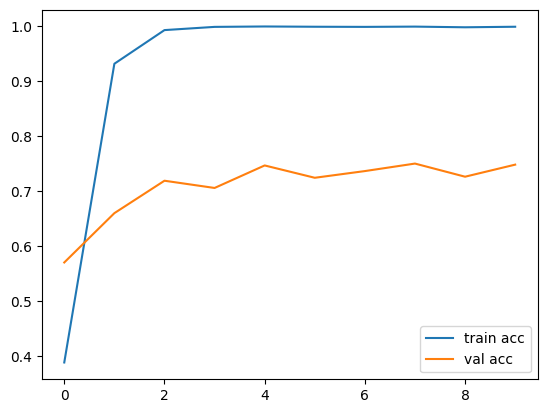

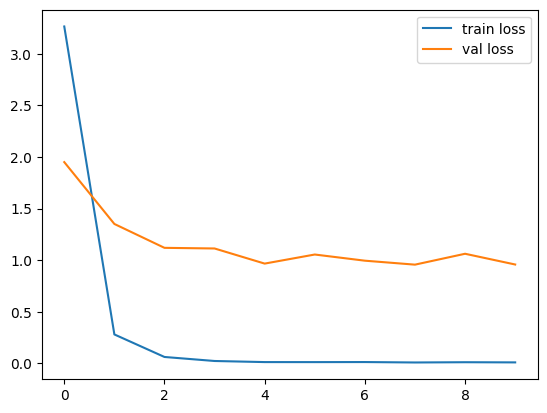

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
# model.evaluate(test_x,test_y,batch_size=32)
model.evaluate(test_set,batch_size=32)

64/64 [==============================] - 10s 155ms/step - loss: 0.9506 - accuracy: 0.7411


[0.950592041015625, 0.7410845160484314]

## Trial 2

In [ ]:
prpVGG19()

Streaming output truncated to the last 5000 lines.
image_06723.jpg
image_03459.jpg
image_07428.jpg
image_05571.jpg
image_06100.jpg
image_00492.jpg
image_02552.jpg
image_05173.jpg
image_00979.jpg
image_02712.jpg
image_03062.jpg
image_03519.jpg
image_05085.jpg
image_04431.jpg
image_00740.jpg
image_04782.jpg
image_02486.jpg
image_03318.jpg
image_05482.jpg
image_07927.jpg
image_00326.jpg
image_03193.jpg
image_04161.jpg
image_06252.jpg
image_02159.jpg
image_07532.jpg
image_04788.jpg
image_05076.jpg
image_01763.jpg
image_07294.jpg
image_02101.jpg
image_05254.jpg
image_03080.jpg
image_07166.jpg
image_03023.jpg
image_06839.jpg
image_07171.jpg
image_02554.jpg
image_02358.jpg
image_02797.jpg
image_01273.jpg
image_03824.jpg
image_07256.jpg
image_00419.jpg
image_05049.jpg
image_04248.jpg
image_07419.jpg
image_04454.jpg
image_05304.jpg
image_00675.jpg
image_05207.jpg
image_00573.jpg
image_03839.jpg
image_03431.jpg
image_02946.jpg
image_03043.jpg
image_03908.jpg
image_04906.jpg
image_03371.jpg
image

In [ ]:
train_path = 'data/images/train'
val_path = 'data/images/test'
test_path = 'data/images/val'

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 4094 images belonging to 102 classes.
Found 2048 images belonging to 102 classes.
Found 2047 images belonging to 102 classes.


In [ ]:
from tensorflow.keras.utils import to_categorical


IMAGE_SIZE = [224, 224]

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted.
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg19 is now flattened.
prediction = Dense(102, activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes


model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)



model.compile(  # loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
history = model.fit(training_set, validation_data=val_set, epochs=10, callbacks=[early_stop], batch_size=16)
# history = model.fit(
#   train_x,
#   train_y,
#   validation_data=(val_x,val_y),
#   epochs=10,
#   callbacks=[early_stop],
#   batch_size=32,shuffle=True)


80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

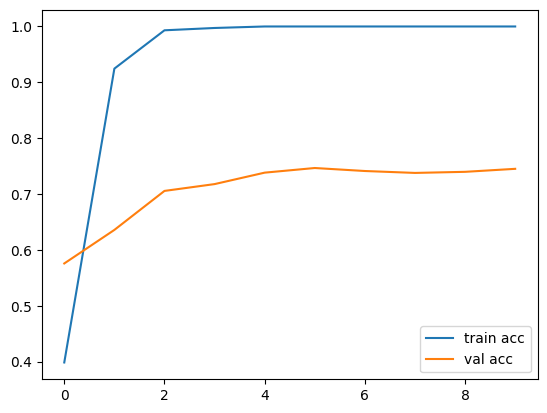

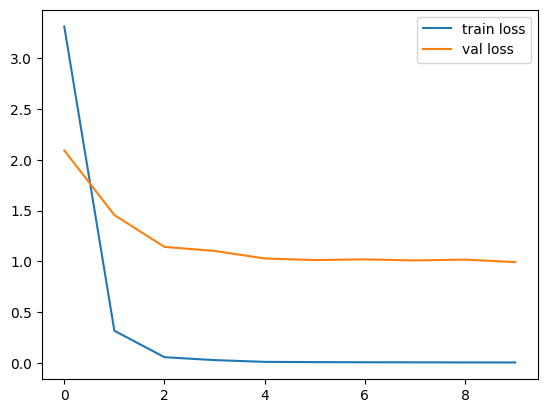

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_set,batch_size=32)

64/64 [==============================] - 15s 236ms/step - loss: 0.9571 - accuracy: 0.7513


[0.9570931196212769, 0.7513434290885925]